### 0.회귀모델 : 보스턴 주택가격 예측
- 다중 회귀 (Feature가 여러 개)
- Linear Regression은 숫자로된 데이터를 예측하는 것으로 target이 연속형 이어야 함
- 예) 엄마, 아빠의 키로 자녀의 키 예측

#### 0-1.데이터 가져오기

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# [1] 보스턴 데이터 가져와서 DataFrame 만들기
df = pd.read_csv('data_05/boston.csv')

In [3]:
# [2] DataFrame의 첫 5개 행을 출력해 본다
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# [3] df의 column 별 Name, Non-Null Count, dtype을 알아본다
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.corr()['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [7]:
# 독립변수들끼리의 상관계수를 알아봄 ( 0.99 0.97 과 같이 
# 큰 상관계수가 나오면 주성분분석을 통해 새로운 변수 생성)
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
sns.heatmap?

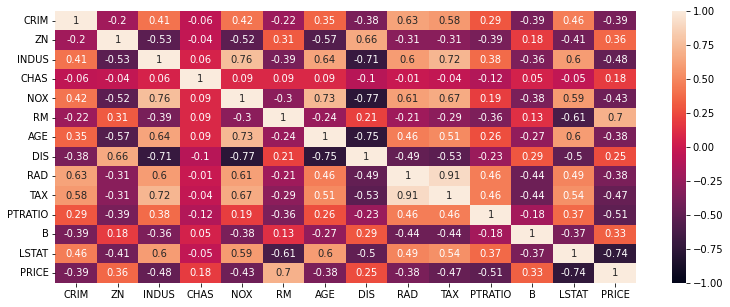

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 5))
sns.heatmap(df.corr().round(2), vmin=-1.0, annot=True)
plt.show()

In [14]:
# 1개의 종류를 갖는 것은 제외
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [15]:
# [4] df에 대한 통계량을 확인한다 (describe())
df['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

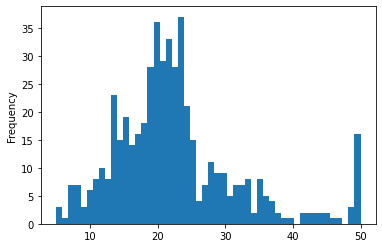

In [16]:
df['PRICE'].plot.hist(bins=50)
plt.show()

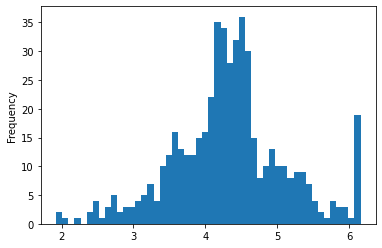

In [17]:
# [TIP] Boxcox 변환
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html?highlight=boxcox#scipy.stats.boxcox
# 
from scipy import stats
price, optimal_lambda = stats.boxcox(df['PRICE'])
pd.Series(price).plot.hist(bins=50)
plt.show()

In [ ]:
# y 값을 boxcox를 사용해 정규분포로 만든 경우
# 모델링에서는 'price' 를 사용한다
# y_pred = model.predict(new_data) -> inverse (역변환) -> PRICE

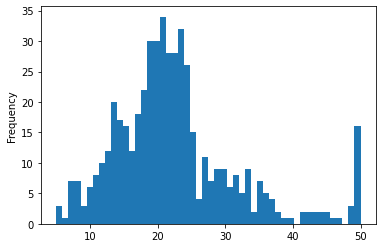

In [19]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html
import scipy
org_price = scipy.special.inv_boxcox(price, optimal_lambda)
pd.Series(org_price).plot.hist(bins=50)
plt.show()

In [21]:
temp = pd.DataFrame()
temp['PRICE'] = df.PRICE
temp['price_boxcox'] = price
temp['INV_PRICE'] = org_price
temp.head(5)

,PRICE,price_boxcox,INV_PRICE
0,24.0,4.572936,24.0
1,21.6,4.365582,21.6
2,34.7,5.336943,34.7
3,33.4,5.254954,33.4
4,36.2,5.428607,36.2


#### 0-2.스케일링, 데이터 분할



In [22]:
# [5] 다음의 순서로 스케일링과 데이터 분할을 수행한다
# x,y 데이터를 만들어, training, test용 데이터로 분할 한다
# 1. df(보스턴 데이터의 DataFrame) 의 'CRIM':'LSTAT' 열을 X로 지정한다
# 2. df의 'PRICE' 열을 y로 지정한다
# 3. 스케일링 - StandardScaler
# 4. X, y를 75%:25%의 비율로 random_state=1을 사용해 분할하여 X_train, X_test, y_train, y_test로 저장한다
# 5. x_train, x_test, y_train, y_test 각각의 shape을 확인한다

X = df.loc[:, 'CRIM':'LSTAT']
y = df['PRICE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.25,
                                                    random_state=1)
[x.shape for x in [x_train, x_test, y_train, y_test]]

[(379, 13), (127, 13), (379,), (127,)]

#### 0-3. 모델 학습 및 평가
최소 제곱법 in sklearn
- ```sklearn.linear_model.LinearRegression(fit_intercept, normalize)```
    - OLS(Ordinary Least Sqaures) 최소 제곱 추정 방식 구현
    - `fit_intercept=True` : bias 사용 여부
    - `normalize = False` : 수행 전에 입력 데이터 정규화, `fit_inercept=False`인 경우 무시
- fit(X, y)를 사용하여 학습 실시    
- fit() 수행 후 결과 확인    
    - `coef_` :  W 계수
    - `intercept_` : bias 절편
    - ```y = Wx + bias```

In [23]:
# [6] train 데이터와 LinearRegression()을 사용하여 model을 생성, 학습한다
model = LinearRegression().fit(x_train, y_train)

# [7] train 및 test 데이터를 사용하여 model의 성능을 평가한다 
print('학습 데이터 성능 : %.4f' % model.score(x_train, y_train))
print('평가 데이터 성능 : %.4f' % model.score(x_test, y_test))

학습 데이터 성능 : 0.7168
평가 데이터 성능 : 0.7789


In [ ]:
# train score:0.717    test score :0.779

In [ ]:
# y = w0*CRIM + w1*ZN + w2*INDUS .... + wn-1*LSTAT + intercept

In [ ]:
# CRIM	     ZN	 INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE
# -0.983	1.331	0.262	0.616	-2.458	2.02	0.194	-3.096	2.66	-1.797	-2.154	0.573	-3.977	24.0

In [27]:
# [8] 회귀계수(=기울기)를 확인한다

A = pd.Series(model.coef_, index=X.columns).round(3).to_frame().T
A

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.983,1.331,0.262,0.616,-2.458,2.02,0.194,-3.096,2.66,-1.797,-2.154,0.573,-3.977


In [25]:
# [9] 절편을 확인한다
model.intercept_

22.580556185498054

#### 0-4.성능평가

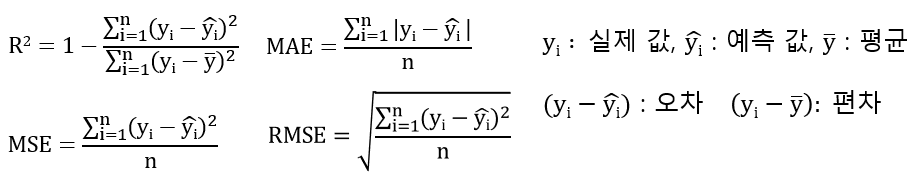

sklearn.matrics API 사용

- ```sklearn.metrics.r2_score(y_ture, y_pred)```
- ```sklearn.metrics.mean_absolute_error(y_ture, y_pred)```
- ```sklearn.metrics.mean_squared_error(y_ture, y_pred)```
- rmse는 mse를 구해서 np.sqrt() 또는 mse ** 0.5를 사용해 구함

In [49]:
A, B = model.coef_, model.intercept_
A, B 

(array([-0.9832923 ,  1.33109396,  0.26249369,  0.61622649, -2.45795465,
         2.01959543,  0.19434954, -3.09566301,  2.65991005, -1.79736111,
        -2.15445302,  0.57253349, -3.97659543]),
 22.580556185498054)

In [50]:
D = df.iloc[0, :-1].to_numpy()
D

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [52]:
sum(A * D) + B   # 확인 요망

-295.7798305649969

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import numpy as np

def print_lr_errors(model, X_test, y_test):
    y_pred = model.predict(X_test)
    #print(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'MAE:{mae:.3f}, MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}, MAPE:{mape:.3f}')

print_lr_errors(model, x_train, y_train)
print_lr_errors(model, x_test, y_test)

MAE:3.251, MSE:22.478, RMSE:4.741, R2:0.717, MAPE:0.162
MAE:3.575, MSE:21.898, RMSE:4.680, R2:0.779, MAPE:0.175


회귀평가지표 : https://mizykk.tistory.com/102
- https://aliencoder.tistory.com/43
- https://ahnjg.tistory.com/90 - (rmsle - 더 작게 예측되는 것이 있으면 패널티 부여)
- (mse - 이상치(큰 차이가 있는 예측)에 패널티 부여)

In [55]:
# 예측값 구하기
model.predict(x_train[:5])

array([22.15327703, 23.46260627, 28.23582938, 20.49886493, 23.95879634])

In [56]:
# 집값은 0 보다 커야함! 그런데 음수가 나왔음
# 정답과 비교해서 알아보면 좋겠다
temp = model.predict(x_train)
temp[temp<0]
#(model.predict(x_train) < 0).sum()

array([-2.76179304])

In [ ]:
pd.DataFrame(x_train, columns=X.columns)[temp<0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
227,0.514104,0.0,0.646628,0.0,0.633745,0.18356,1.0,0.048068,1.0,0.914122,0.808511,0.221771,0.972682


In [ ]:
y_train[227]

31.6

In [57]:
# 실제값과 예측값의 차이값 구하기
temp = pd.DataFrame()
temp['y'] = y_test
temp['y_pred'] = model.predict(x_test)
temp['diff'] = (temp['y'] - temp['y_pred']).abs()
temp.sort_values('diff', ascending=False)

,y,y_pred,diff
370,50.0,34.177758,15.822242
233,48.3,35.481421,12.818579
214,23.7,10.999026,12.700974
225,50.0,37.739979,12.260021
267,50.0,39.011792,10.988208
...,...,...,...
42,25.3,25.072464,0.227536
324,25.0,24.776588,0.223412
435,13.4,13.322647,0.077353
483,21.8,21.859183,0.059183


In [ ]:
import shelve
# 만든 모델을 저장하는 방법

with shelve.open('cj_data') as data:
    data['boston_LR'] = model
    data['boston_scaler'] = scaler

In [ ]:
import shelve
# 저장된 모델을 불러오는 방법
with shelve.open('cj_data') as data:
    model2 = data['boston_LR']
    scaler = data['boston_scaler']

In [ ]:
model2.predict(x_test)

## 1.Regularization 이해

- 규제 모델
    - Ridge Regression : L2 규제 가중치
    - Lasso Regression : L1 규제 가중치 적용
    - Elastic Net : L1 + L2 규제 가중치 적용

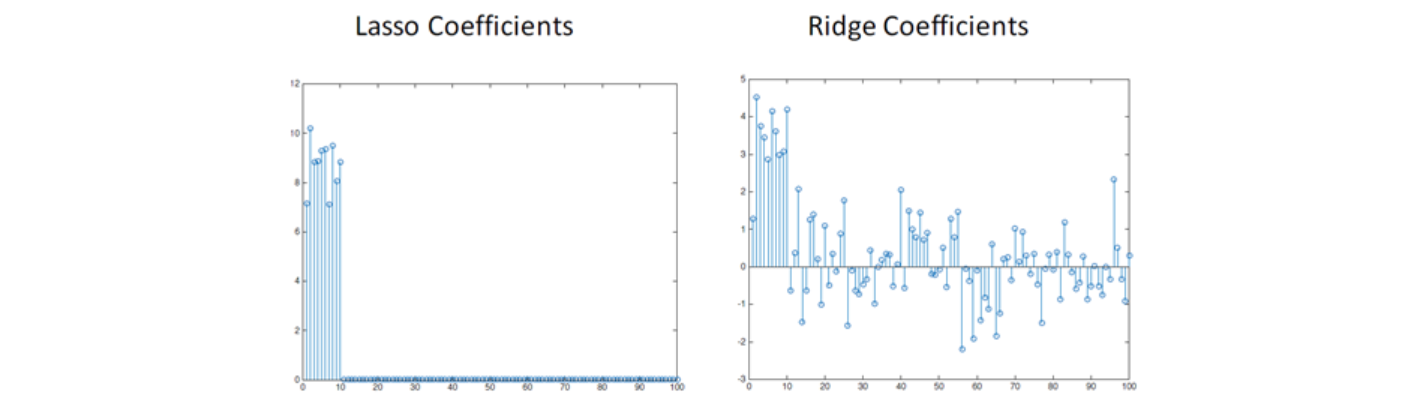

In [ ]:
X축 : feature, Y축 : coefficient(기울기)
- Lasso : 0이 되는 것이 있다
- Ridge : 0이 되지 않지만, coef 가 작아짐

## 2.데이터 준비

In [58]:
# sin 파형을 따르는 데이터를 1, 4, 15 차항으로 변환하여 결과 비교
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

### 2-1.다항 회귀

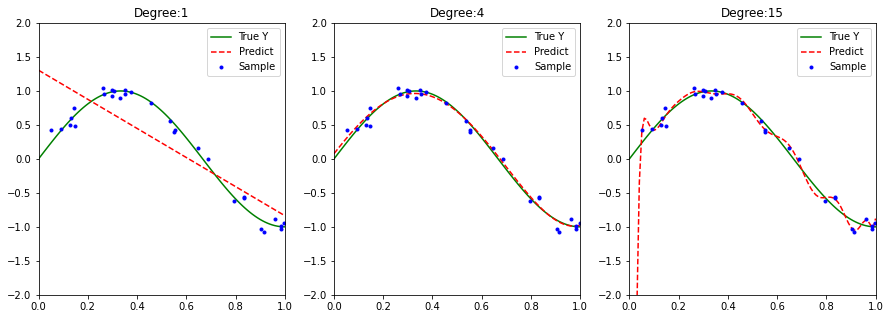

In [59]:
degrees = (1, 4, 15)
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1, 1), y)
    
    X_test = np.linspace(0, 1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')  # 정답
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')  # 다차식 - 예측값
    
    plt.plot(X, y, 'b.', label='Sample') # 샘플
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title(f'Degree:{degree}')
plt.show()

### 2-2.다항 + Ridge 사용
- 15차항 변환된 데이터를 기반으로 Ridge Regression 모델 이용

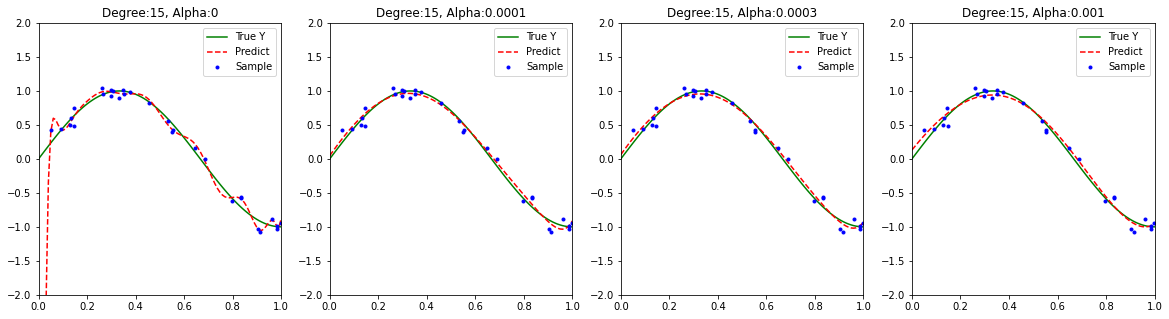

In [64]:
from sklearn.linear_model import Ridge

alphas = (0, 0.0001, 0.0003, 0.001) #, 0.01, 0.1)#, 1, 10)
plt.figure(figsize=((20, 5)))

for i, alpha in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=15)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1, 1), y)

    X_test = np.linspace(0, 1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),
            'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title(f'Degree:15, Alpha:{alpha}')
plt.show() 

## 3.Ridge Regression
- 보스턴 주택 가격 예측
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [65]:
import pandas as pd

# 보스턴 주택 데이터 불러오기
df = pd.read_csv('data_05/boston.csv')

# 앞에서 5개의 데이터를 출력해 확인한다
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures?

In [76]:
import numpy as np
arr = np.arange(1, 7).reshape(-1, 2)
print(arr)
poly = PolynomialFeatures(degree=3, include_bias=False)
A = poly.fit_transform(arr)
print(poly.get_feature_names_out())
temp = pd.DataFrame(A, columns=poly.get_feature_names_out())
temp.corr()

[[1 2]
 [3 4]
 [5 6]]
['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']


,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
x0,1.000000,1.000000,0.981981,0.986666,0.989743,0.948141,0.954594,0.960769,0.966282
x1,1.000000,1.000000,0.981981,0.986666,0.989743,0.948141,0.954594,0.960769,0.966282
x0^2,0.981981,0.981981,1.000000,0.999645,0.998906,0.991124,0.993692,0.995871,0.997530
x0 x1,0.986666,0.986666,0.999645,1.000000,0.999797,0.987231,0.990353,0.993099,0.995306
x1^2,0.989743,0.989743,0.998906,0.999797,1.000000,0.983823,0.987361,0.990536,0.993155
x0^3,0.948141,0.948141,0.991124,0.987231,0.983823,1.000000,0.999780,0.999100,0.998013
x0^2 x1,0.954594,0.954594,0.993692,0.990353,0.987361,0.999780,1.000000,0.999770,0.999115
x0 x1^2,0.960769,0.960769,0.995871,0.993099,0.990536,0.999100,0.999770,1.000000,0.999787
x1^3,0.966282,0.966282,0.997530,0.995306,0.993155,0.998013,0.999115,0.999787,1.000000


In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 1. 보스턴 데이터(df) 중 'CRIM':'LSTAT'에 대해 X로 사용한다
# 2. 보스턴 데이터(df) 중 'PRICE'를 y 로 이름 붙인다
# 3. X에 대해 MinMaxScaler()를 적용하여 결과를 x_scaled로 이름 붙인다 

X = df.loc[:, 'CRIM':'LSTAT']
y = df['PRICE']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

# 4. 상수항 없는 3차항 변환을 위한 PolynomialFeatures 객체를 생성하여 P라는 이름을 지정한다.
# 5. x_scaled를 사용하여 3차항 변환을 적용하고 결과를 x_poly에 저장한다
degree = 3
P = PolynomialFeatures(degree=degree)
x_poly = P.fit_transform(x_scaled)
# 6. x_poly, y 데이터를 75%:25%로 분할하여 저장한다. (random_state=0을 사용함)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=0)

In [78]:
from sklearn.linear_model import Ridge
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=1 사용) 
alpha=1
model = Ridge(alpha=alpha)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.92427491462836, 0.786534289984109)

In [79]:
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=0.1 사용) 
# train, test 성능을 확인한다
alpha=0.1
model = Ridge(alpha=alpha)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.953715539703467, 0.7905570432110306)

In [80]:
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=10 사용) 
# train, test 성능을 확인한다
alpha=10
model = Ridge(alpha=alpha)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8555501939781199, 0.7230747746713162)

### 3-1.L2 규제 효과
- L2 규제를 적용하면 특정 가중치가 너무 커지거나 너무 작은 값을 가지지 않도록 설정
- 즉 규제 강도가 커질수록 특정 가중치에 값이 쏠리는 현상이 제거
    - 일부만 가지고 모델링을 하는 것이 아니라 특성을 골고루 사용하는 의미로 해석 가능
- 규제 강도를 0.1, 1, 10으로 설정하여 학습 후 가중치 값 조회

In [81]:
ridge01 = Ridge(alpha=0.1).fit(X, y)
ridge01_coef = pd.Series(ridge01.coef_, index=X.columns)

ridge1 = Ridge(alpha=1).fit(X, y)
ridge1_coef = pd.Series(ridge1.coef_, index=X.columns)

ridge10 = Ridge(alpha=10).fit(X, y)
ridge10_coef = pd.Series(ridge10.coef_, index=X.columns)

In [84]:
ridge10_coef

CRIM      -0.101435
ZN         0.049579
INDUS     -0.042962
CHAS       1.952021
NOX       -2.371619
RM         3.702272
AGE       -0.010707
DIS       -1.248808
RAD        0.279596
TAX       -0.013993
PTRATIO   -0.797945
B          0.010037
LSTAT     -0.559366
dtype: float64

### 3-2.L2 규제 효과 시각화
- 규제 강도에 따른 가중치 값을 시각화
- 규제 강도가 커질수록 특정 특성(NOX)이 큰 값을 가지지 못하는 것을 확인할 수 있음

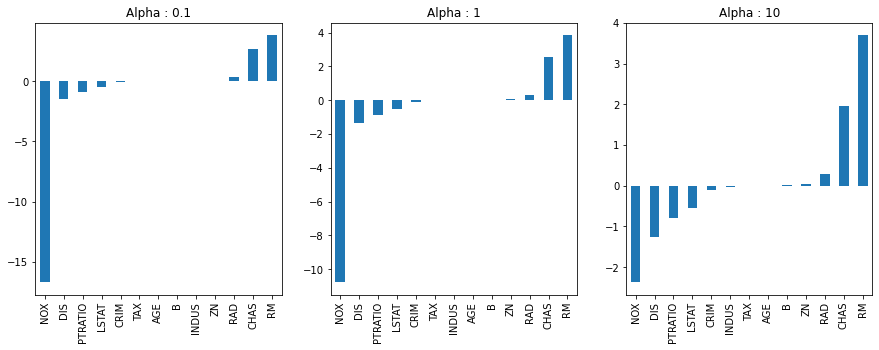

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')

plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')

plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

## 4.Lasso Regression
- 보스턴 주택 가격 예측
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
# 보스턴 데이터는 3.Ridge Regression 에서 만든 것을 그대로 사용한다

In [86]:
from sklearn.linear_model import Lasso
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=1 사용) 
# train, test 성능을 확인한다
alpha = 1
model = Lasso(alpha=alpha).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.2933995968826699, 0.21247966404486662)

In [93]:
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=0.1 사용) 
# train, test 성능을 확인한다
alpha = 0.05
model = Lasso(alpha=alpha, max_iter=5000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8273432266616109, 0.6837024799469456)

In [92]:
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=0.1 사용) 
# train, test 성능을 확인한다
alpha = 0.1
model = Lasso(alpha=alpha, max_iter=5000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.783861983129184, 0.6452299604478746)

In [90]:
Lasso?

In [88]:
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=10 사용) 
# train, test 성능을 확인한다
alpha = 10
model = Lasso(alpha=alpha).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.0, -0.001119359203955339)

### 4-1.L1 규제의 효과
- L1 규제를 적용하면 특정 가중치를 선택
- 즉 중요한 특성만 사용하는 의미로 해석 가능
- 규제 강도를 0.1, 1, 10으로 설정하여 학습 후 가중치 값 조회

In [94]:
# L1 규제의 효과
lasso01 = Lasso(alpha=0.1).fit(X, y)
lasso01_coef = pd.Series(lasso01.coef_, index=X.columns)

lasso1 = Lasso(alpha=1).fit(X, y)
lasso1_coef = pd.Series(lasso1.coef_, index=X.columns)

lasso10 = Lasso(alpha=10).fit(X, y)
lasso10_coef = pd.Series(lasso10.coef_, index=X.columns)

In [99]:
lasso01_coef

CRIM      -0.097894
ZN         0.049211
INDUS     -0.036619
CHAS       0.955190
NOX       -0.000000
RM         3.703202
AGE       -0.010037
DIS       -1.160538
RAD        0.274707
TAX       -0.014570
PTRATIO   -0.770654
B          0.010249
LSTAT     -0.568769
dtype: float64

### 4-2.L1 규제의 효과 시각화
- 규제 강도에 따른 가중치 값을 시각화
- 규제 강도가 커질수록 사용되는 특성의 수가 적은것을 확인
- 무조건 특성을 적게 쓴다고 좋은 것은 아님

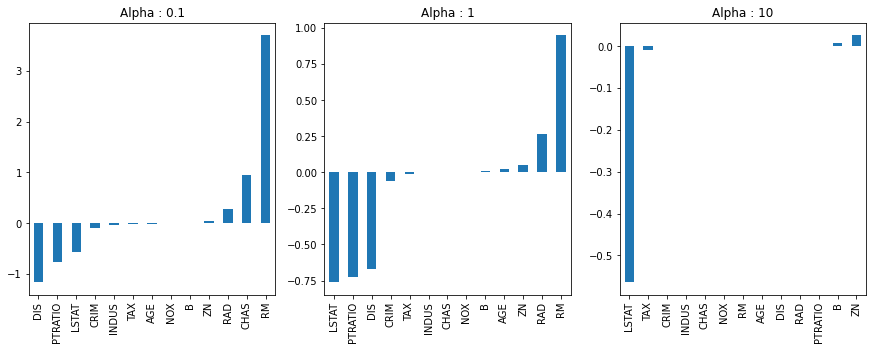

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')

plt.subplot(1, 3, 2)
lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')

plt.subplot(1, 3, 3)
lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

In [ ]:
lasso10_coef  # 몇 몇 회귀계수를 0으로 만들어 해당 변수가 영향력을 잃게 만듦

In [ ]:
# MinMaxScaler, StandardScaler
# PolynomialFeatures - 기능
# Ridge - L2 norm, Lasso - L1 norm 차이점, 기능
# 요약, 설명 - 공지사항 참조 (오늘 저녁)

# boxcox +

In [ ]:
# 화요일 여기까지

## 5.회귀 모델 평가지표

- $R^2$ score
  - model.score(X, y)
  - sklearn.metrics.r2_score(y_true, y_pred)
  - 분산 기반으로 예측 성능을 평가
  - 예측값 분산 / 실제값 분산
- MAE(Mean Absolute Error)
   - sklearn.metrics.mean_absolute_error(y_true, y_pred)
   - 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
- MSE(Mean Squared Error)
   - sklearn.metrics.mean_squared_error(y_true, y_pred)  
   - 실제 값과 예측 값의 차이를 제곱해 평균한 것
- RMSE(Root Mean Squared Error)
   - sklearn API에 없음
   - MSE에 np.sqrt() 또는 ** 0.5를 사용함
   - MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 것
- MSLE(Mean Squared Log Error)
   - sklearn.metrics.mean_squared_log_error(y_true, y_pred)
   - MSE에 로그를 적용해준 지표
- RMSLE(Root Mean Square Log Error) 
   - RMSE에 로그를 적용해준 지표
   - 이상치가 있더라도 변동폭이 크지 않음(이상치에 강건함)
   - 실제값보다 예측값이 작을 때 더 큰 패널티 부여
   - 작게 예측하면 안되는 경우 사용하면 좋음 (배달 시간 예측)
   - 실제값, 예측값에 음수가 있으면 안됨 (오류 발생)
- 참조 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

In [ ]:
# R2_score : 1에 가까울 수록 좋은 성능
# MAE, MSE, RMSE, MSLE, RMSLE :  0에 가까울 수록 좋은 성능 

### 5-1.성능평가 함수

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# [1] r2_score, mae, mse, rmse, msle, rmsle 를 구해 반환하는 함수를 작성합니다.
# 한 개의 행에 6가지 성능평가 결과를 소수점 아래 4자리까지 표시되도록 하여 작성합니다.
def get_scores(model, X, Y):
    pass

### 5-2.모델링 함수

In [ ]:
# [2] make_models 함수를 작성
def make_models(xtrain, xtest, ytrain, ytest):
    pass


### 5-3. 보스톤 데이터 - Ridge

In [ ]:
# 라이브러리 import
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# 데이터 가져오기
df = pd.read_csv('data_05/boston.csv')

# 데이터 분할, 전처리
X = df.loc[:, 'CRIM':'LSTAT']
y = df.loc[:, 'PRICE']
X_scaled = MinMaxScaler().fit_transform(X)
P3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = P3.fit_transform(X_scaled)
print(X_poly.shape, y.shape)

# 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)


# make_models 함수 호출
